## TensorFlow 2 - The Mandelbrot set

In this example (taken from the [TensorFlow website](https://www.tensorflow.org/versions/r0.7/tutorials/mandelbrot/index.html)),
we perform the manditory embarrasingly-parallel example of the calculating the Mandelbrot set. 

In [10]:
import tensorflow as tf
import numpy as np
import matplotlib.pylab as plt
%matplotlib inline

In [11]:
def display_fractal(data):
  # transform the values into a nice colormap and display
    data_cyclic = (6.28*data/20.0).reshape(list(data.shape)+[1])
    rgb = np.concatenate([10+20*np.cos(data_cyclic),
                        30+50*np.sin(data_cyclic),
                        155-80*np.cos(data_cyclic)], 2)
    plt.imshow(rgb)

Now we set up the calculation.  We're going to have a 2d grid of x and y values, and Z a map from those onto the complex plane:

In [12]:
sess = tf.InteractiveSession()
Y, X = np.mgrid[-1.3:1.3:0.005, -2:1:0.005]
Z = X+1j*Y

And now we set these up as tensorflow variables:

In [13]:
xs = tf.constant(Z.astype("complex64"))
zs = tf.Variable(xs)
n_iters = tf.Variable(tf.zeros(Z.shape))

In [14]:
tf.initialize_all_variables().run()

In [15]:
# Compute the new values of z: z^2 + x
zs_ = zs*zs + xs

# Have we diverged with this new value?
not_diverged = tf.complex_abs(zs_) < 4

# Operation to update the zs and the iteration count.
#
# Note: We keep computing zs after they diverge! This
#       is very wasteful! There are better, if a little
#       less simple, ways to do this.
#
step = tf.group(zs.assign(zs_), 
                n_iters.assign_add(tf.cast(not_diverged, tf.float32)))

for i in range(200):
    step.run()

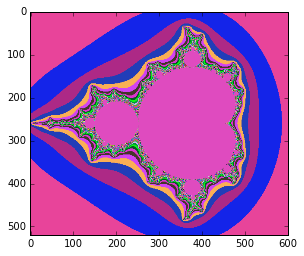

In [16]:
display_fractal(n_iters.eval())

In [17]:
sess.close()